In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
from scipy import integrate
from matplotlib.figure import figaspect
import peakutils

In [44]:
def construct_df(path):
    headers = ['Energy', 'x_im', 'x_re', 'y_im', 'y_re', 'z_im', 'z_re']
    df =pd.read_csv(path, sep=r'\s+', comment='#', names=headers).drop(0)
    df['y_abs'] = np.sqrt(df['y_im']**2 + df['y_re']**2)*10e4
    return df[['Energy','y_abs']]

def get_bands_df(path,low,high, Shift):

    df = pd.read_csv(path,sep=r'\s+', names=['k','E'])
    df['E']*=13.6057
    for i, en in enumerate(df.E):
        if en > Fermi:
            df['E'].iloc[i] += Shift

    df_fermi = pd.DataFrame()
    a,b = [],[]
    for i, en in enumerate(df.E):
        if en > low and en < high:
            a.append(df.k.iloc[i])
            b.append(en)
    df_fermi['k'] = a
    df_fermi['E'] = b
    return df_fermi

def get_gaps(df,Fermi):
    gaplist = []
    energies = {}
    for i, E in enumerate(df.E):
        df1 = df[df.E < Fermi]
        df2 = df[df.E > Fermi]
    for i, E1 in enumerate(df1.E):
        for j, E2 in enumerate(df2.E):
            gaplist.append(E2-E1)
            energies[E2-E1] = (E1,E2)
    return gaplist, energies



peak = 1.32578125
err = .01
low = -2
high = 7
Shift = .522
Fermi = 2
infile1 = 'bn.band.dat.gnu'
infile2 = 'bn.band.dat.nosoc.gnu'

def plot_bands_with_transitions(peak, infile1, infile2, err, low, high, Shift, Fermi, overlay_soc=True):

    df_fermi = get_bands_df(infile1,low,high,Shift)
    if overlay_soc:
        df2 = get_bands_df(infile2,low,high,Shift)


    df_fermi2 = df_fermi.sort_values(by=['k'])
    kvalues = set(df_fermi2['k'])
    dflist = []
    for k in kvalues:
        dflist.append(df_fermi2[df_fermi2.k == k])

    gaps = {}
    energies ={}
    for d in dflist:
        gaps[d.k.iloc[0]], energies[d.k.iloc[0]]=get_gaps(d, Fermi)

    mingaps = {}
    for k in gaps:
        mingaps[k] = np.min(gaps[k])

    transition = peak * 2
    zeroE = Fermi
    w, h = figaspect(1.5)
    fig, ax = plt.subplots(figsize=(w,h))


    for k in gaps:
        for gap in gaps[k]:
            if gap <= transition + err and gap >= transition - err:
                print(gap, gap/2, k, energies[k][gap])
                plt.plot([k, k], [energies[k][gap][0] - zeroE, energies[k][gap][1]-zeroE], 'k-', lw=2)            

    plt.plot(df_fermi['k'], df_fermi['E']-zeroE, label='With SOC')
    if overlay_soc:
        plt.plot(df2['k'],df2['E']-zeroE, label='Without SOC')
    plt.axis([0.01, 1.57, low+.2-zeroE, high-.2-zeroE])
    plt.xticks([0,.6662,.9995, 1.5769], ('$\Gamma$', 'K', 'M', '$\Gamma$'))
    plt.ylabel("Energy (eV)")
    plt.title("WSe2 With GW+BSE Shift (PBE)\n[" + str(peak) + " eV Peak]")
    plt.legend(loc='upper right')

    plt.show()

In [24]:
shgfile = 'wse2_bse_spinorb_chi2_pbe.txt'

y = np.array(construct_df(shgfile)['y_abs'])
x = np.array(construct_df(shgfile)['Energy'])
ind = np.array(peakutils.indexes(y, thres=0.04/max(y), min_dist=.05))

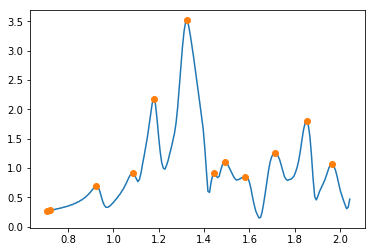

In [17]:
plt.plot(x,y)
plt.plot(x[ind], y[ind],  marker='o', linestyle='')

In [35]:
x[ind][2:]

array([ 0.925     ,  1.08671875,  1.178125  ,  1.32578125,  1.4453125 ,
        1.49453125,  1.57890625,  1.7125    ,  1.853125  ,  1.965625  ])

1.86488259 0.932441295 0.6995 (1.2449215499999999, 3.1098041400000005)
1.84991632 0.92495816 0.6828 (1.2748540900000001, 3.12477041)


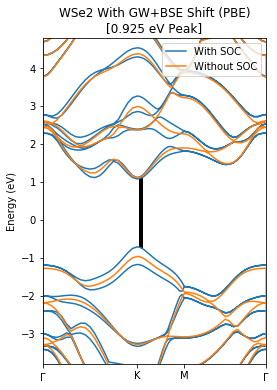

2.17373198 1.08686599 0.5996 (1.1279125300000001, 3.30164451)
2.16420799 1.082103995 0.7495 (1.0993405599999999, 3.2635485500000003)


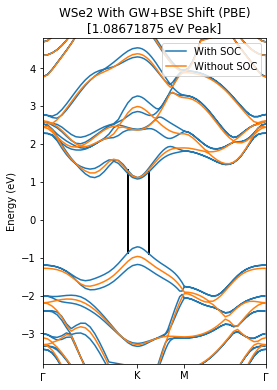

2.36965406 1.18482703 0.5662 (0.98505268000000012, 3.3547067400000001)
2.37101463 1.185507315 0.6995 (0.79185174000000003, 3.1628663699999997)


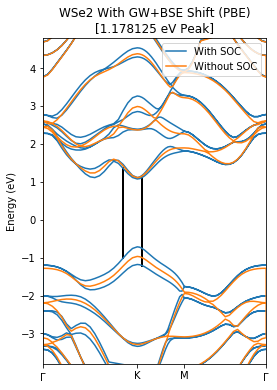

2.64040749 1.320203745 0.5329 (0.84491397000000001, 3.4853214599999998)
2.66081604 1.33040802 0.3997 (0.49796862000000003, 3.1587846600000002)
2.66081604 1.33040802 0.3664 (0.44898810000000006, 3.1098041400000005)


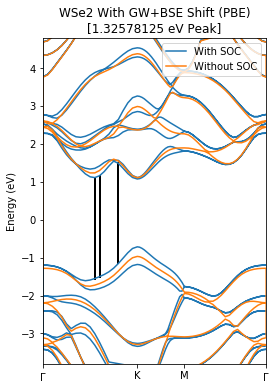

2.89075237 1.445376185 0.8662 (0.77280376000000006, 3.6635561299999999)
2.90435807 1.452179035 0.3664 (0.44898810000000006, 3.35334617)
2.89483408 1.44741704 0.7995 (0.56327598000000001, 3.4581100600000001)


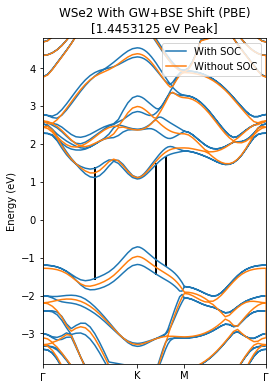

2.98871341 1.494356705 0.2665 (0.41497385000000003, 3.4036872599999999)
2.97918942 1.48959471 0.3331 (0.15102327000000002, 3.1302126900000005)
3.00640082 1.50320041 0.5329 (0.47892064000000006, 3.4853214599999998)
2.97238657 1.486193285 0.3997 (0.18639809000000002, 3.1587846600000002)
2.99551626 1.49775813 0.2332 (0.47892064000000006, 3.4744368999999997)
2.98599227 1.492996135 0.2332 (0.47892064000000006, 3.4649129099999998)
2.99279512 1.49639756 0.8162 (0.52518002000000008, 3.5179751399999999)


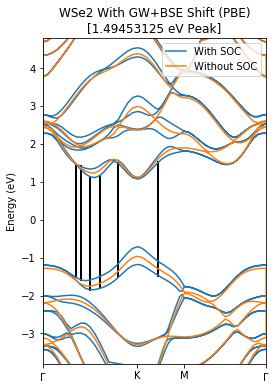

3.16694808 1.58347404 0.2998 (0.18911923, 3.3560673100000002)
3.16966922 1.58483461 0.4996 (0.37415675000000004, 3.5438259700000003)
3.15878466 1.57939233 0.6329 (1.24083984, 4.3996244999999998)
3.15742409 1.578712045 0.1665 (0.63266505000000006, 3.7900891400000001)
3.1479001 1.57395005 0.1665 (0.64218903999999999, 3.7900891400000001)
3.16830865 1.584154325 1.4325 (0.68300614000000004, 3.85131479)
3.16830865 1.584154325 1.4325 (0.68300614000000004, 3.85131479)
3.16830865 1.584154325 1.4325 (0.68300614000000004, 3.85131479)
3.16830865 1.584154325 1.4325 (0.68300614000000004, 3.85131479)
3.17102979 1.585514895 0.8495 (0.45170924000000001, 3.62273903)
3.15606352 1.57803176 0.6995 (1.2449215499999999, 4.4009850700000008)
3.16694808 1.58347404 0.8162 (0.52518002000000008, 3.6921281000000006)
3.16558751 1.582793755 1.317 (0.29524369, 3.4608312000000003)
3.16558751 1.582793755 1.317 (0.29524369, 3.4608312000000003)
3.16558751 1.582793755 1.317 (0.29524369, 3.4608312000000003)
3.16558751 1.582

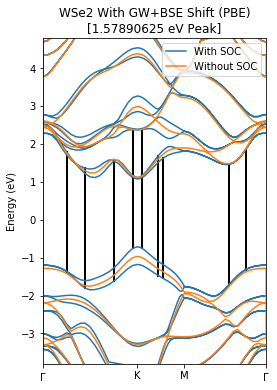

3.42137467 1.710687335 0.2665 (0.41497385000000003, 3.8363485200000005)
3.43634094 1.71817047 0.2665 (-0.032653679999999997, 3.4036872599999999)
3.44178322 1.72089161 0.4996 (0.72246267000000008, 4.1642458900000001)
3.43634094 1.71817047 0.0666 (0.7823277500000001, 4.2186686900000003)
3.43498037 1.717490185 0.0666 (0.78368831999999999, 4.2186686900000003)
3.44178322 1.72089161 0.0999 (0.75239521000000009, 4.19417843)
3.43906208 1.71953104 0.0999 (0.75511634999999999, 4.19417843)
3.41457182 1.70728591 0.8828 (0.73062609000000001, 4.1451979100000003)
3.4064084 1.7032042 1.2593 (0.073470780000000013, 3.4798791800000002)
3.4064084 1.7032042 1.2593 (0.073470780000000013, 3.4798791800000002)
3.4064084 1.7032042 1.2593 (0.073470780000000013, 3.4798791800000002)
3.4064084 1.7032042 1.2593 (0.073470780000000013, 3.4798791800000002)
3.43770151 1.718850755 1.4614 (0.73334723000000013, 4.1710487399999998)
3.43770151 1.718850755 1.4614 (0.73334723000000013, 4.1710487399999998)
3.43770151 1.71885075

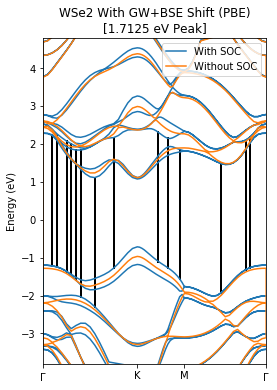

3.72070007 1.860350035 0.0 (0.80273629999999996, 4.5234363699999998)
3.72070007 1.860350035 0.0 (0.80273629999999996, 4.5234363699999998)
3.72070007 1.860350035 0.0 (0.80273629999999996, 4.5234363699999998)
3.72070007 1.860350035 0.0 (0.80273629999999996, 4.5234363699999998)
3.7193395 1.85966975 0.2665 (0.28163799, 4.0009774900000004)
3.69757038 1.84878519 0.2998 (0.18911923, 3.8866896100000003)
3.71253665 1.856268325 0.3331 (0.40817100000000001, 4.1207076499999999)
3.72342121 1.861710605 0.5996 (0.70749640000000003, 4.4309176099999998)
3.70029152 1.85014576 0.4996 (0.72246267000000008, 4.42275419)
3.71661836 1.85830918 0.5662 (0.59592966000000003, 4.3125480200000004)
3.69893095 1.849465475 1.548 (0.79865459000000005, 4.4975855400000002)
3.69893095 1.849465475 1.548 (0.79865459000000005, 4.4975855400000002)
3.69893095 1.849465475 1.548 (0.79865459000000005, 4.4975855400000002)
3.69893095 1.849465475 1.548 (0.79865459000000005, 4.4975855400000002)
3.69893095 1.849465475 0.0333 (0.797294

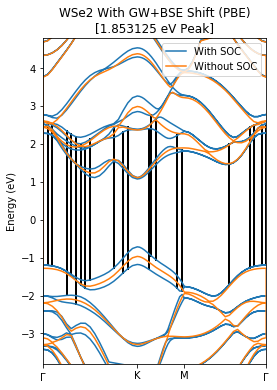

3.92614614 1.96307307 0.2665 (-0.032653679999999997, 3.89349246)
3.93975184 1.96987592 0.2998 (-0.73198666000000001, 3.20776518)
3.91662215 1.958311075 0.433 (0.22993632999999999, 4.1465584800000004)
3.94383355 1.971916775 0.433 (-0.67484272000000001, 3.2689908299999999)
3.93022785 1.965113925 1.5191 (0.78777003000000001, 4.7179978800000004)
3.93022785 1.965113925 1.5191 (0.78777003000000001, 4.7179978800000004)
3.93022785 1.965113925 1.5191 (0.78777003000000001, 4.7179978800000004)
3.93022785 1.965113925 1.5191 (0.78777003000000001, 4.7179978800000004)
3.94791526 1.97395763 0.0333 (0.79729402000000005, 4.745209280000001)
3.94791526 1.97395763 0.0333 (0.79729402000000005, 4.745209280000001)
3.94791526 1.97395763 0.0666 (0.7823277500000001, 4.7302430100000006)
3.94655469 1.973277345 0.0666 (0.78368831999999999, 4.7302430100000006)
3.923425 1.9617125 0.0999 (0.75239521000000009, 4.6758202100000004)
3.92070386 1.96035193 0.0999 (0.75511634999999999, 4.6758202100000004)
3.94927583 1.974637

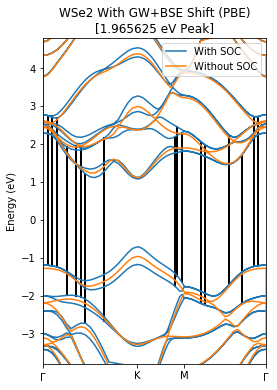

In [51]:
# peak = 1.32578125
err = .02
low = -2
high = 7
Shift = .522
Fermi = 2
infile1 = 'bn.band.dat.gnu'
infile2 = 'bn.band.dat.nosoc.gnu'
for i in x[ind][2:]:
    plot_bands_with_transitions(i, infile1, infile2, err, low, high, Shift, Fermi)